In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [69]:
file_path = 'project_results.txt'
df = pd.read_csv(file_path, sep=';')

columns = ['Model', 'Epochs', 'Learning Rate', 'Accuracy', 'Parameters','Factorized', 'Quantize', 'DA', 'Prune Size', 'Prune Type','Prune Ratio[%]', 'Time[min]', 'Train Losses', 'Test Losses','Accuracies', ' batch_size']

print(df[columns])


           Model  Epochs  Learning Rate  Accuracy  Parameters  Factorized  \
0   PreActResNet      50           0.05     77.35     4946596       False   
1   PreActResNet      50           0.05     82.67     4946596       False   
2   PreActResNet      50           0.05     86.34     4946596       False   
3   PreActResNet      50           0.05     74.73     4946596       False   
4   PreActResNet      50           0.05     84.81     4946596       False   
5   PreActResNet      50           0.05     82.04     4946596       False   
6   PreActResNet      50           0.05     75.87     3543204        True   
7   PreActResNet      50           0.05     81.65     3543204        True   
8   PreActResNet     100           0.05     85.84     4946596       False   
9   PreActResNet     100           0.05     88.66     4946596       False   
10  PreActResNet      50           0.05     74.67      768484        True   
11  PreActResNet      50           0.05     81.41      768484        True   

In [53]:
epochs = 'Epochs'
acc = 'Accuracy'
lr = 'Learning Rate'
MX = 'MixUp'
params = 'Parameters'
amount = 'Amount'

In [54]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return float(value.replace('[', '').replace(']', '').split(',')[0])  # Assuming the first value is correct

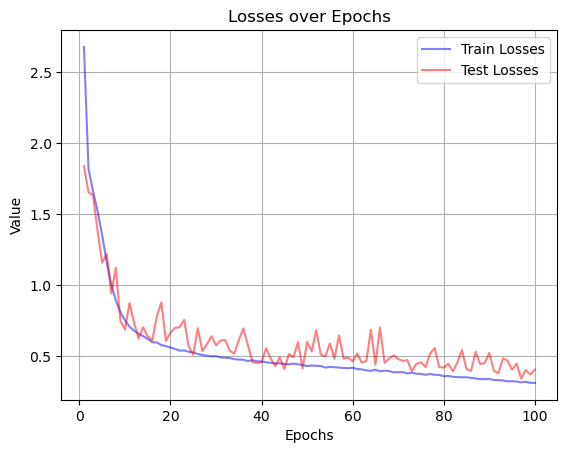

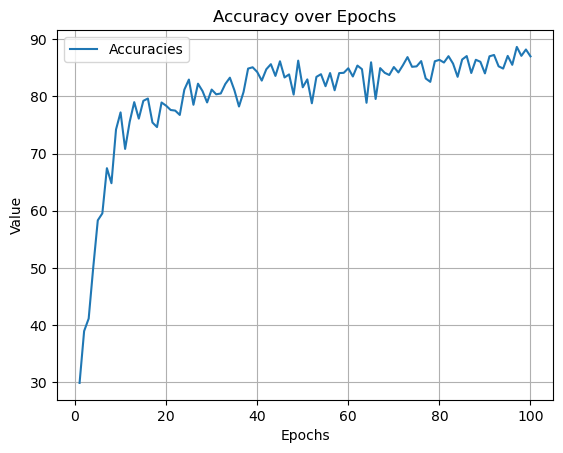

In [67]:
row = 9
epochs = df.loc[row]['Epochs']
epochs = range(1,epochs+1)

train_losses = df.loc[row]['Train Losses'].strip('[]').split(',')
train_losses = np.array(train_losses, dtype=float).astype(float)
test_losses = df.loc[row]['Test Losses'].strip('[]').split(',')
test_losses = np.array(test_losses, dtype=float).astype(float)


plt.figure(1)
plt.plot(epochs, train_losses, label='Train Losses', color='blue', alpha=0.5)
plt.plot(epochs, test_losses, label='Test Losses', color='red', alpha=0.5)

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses over Epochs')
plt.legend()
plt.grid(True)
plt.show()
# plt.savefig('images/Project/PreAct_100_DA_losses.png')

accuracies = df.loc[row]['Accuracies'].strip('[]').split(',')
accuracies = np.array(accuracies, dtype=float).astype(float)

plt.figure(2)
plt.plot(epochs, accuracies, label='Accuracies')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()
# plt.savefig('images/Project/PreAct_100_DA_accuracies.png')


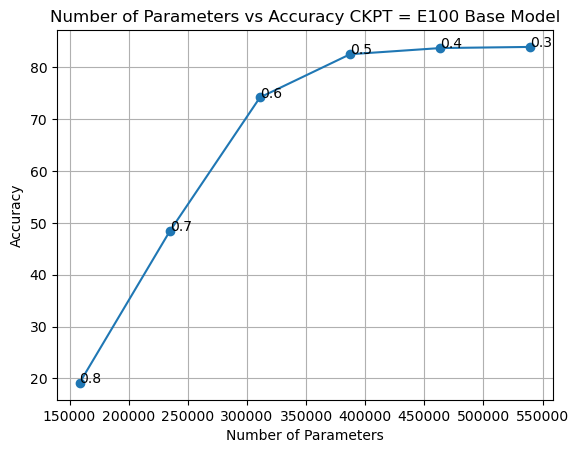

In [71]:
rows = [28, 29, 30, 31, 32, 33]
parameters = df.loc[rows, 'Parameters']
accuracy = df.loc[rows, 'Accuracy'].reset_index(drop=True)
prune = df.loc[rows,'Prune Size'].reset_index(drop=True)
n = ['0.3','0.4','0.5','0.6','0.7','0.8']

fig, ax = plt.subplots()
ax.scatter(prune, accuracy)
ax.plot(prune, accuracy)

for i, txt in enumerate(n):
    ax.annotate(txt, (prune[i], accuracy[i]))

plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Number of Parameters vs Accuracy CKPT = E100 Base Model')
plt.grid(True)
# plt.show()
plt.savefig('images/Project/Base100_F2_B64_ParamsVSAccuracy.png')